<a href="https://colab.research.google.com/github/EOKELLO/ip-week-3/blob/master/2Moringa_Data_Science_Core_W1_Independent_Project_2019_07_Elizabeth_Okello_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
#we state our hypothesis

#which individuals are likely to use or have a bank account.

In [3]:
#we now load our dataset
df = pd.read_csv('Financial Dataset.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#we now remane out dataset columns to make the column name uniform with the informaton captured in the data description
#df = df.columns[['country','year','uniqueid','account','location_type','cellphone_access','household_size','age_of_respondent','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type']]
#df.head()
df = df.rename(columns={'The relathip with head':'relationship_with_head',
                         'Type of Location':'location_type',
                         'Cell Phone Access':'cellphone_access',
                         'Respondent Age':'age_of_respondent',
                         'Level of Educuation':'education_level',
                         'Type of Job':'job_type'})


In [5]:
df.head()

,country,year,uniqueid,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


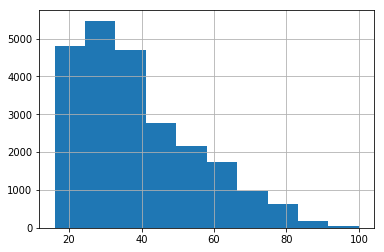

In [6]:
df['age_of_respondent'].hist()

In [7]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [8]:
#we want to understand our dataset by checking the number of records,missing values and data types
df.shape

(23524, 13)

In [9]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [10]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [11]:
#we the proceed to treat our missing values
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

country
False    23510
True        14
Name: country, dtype: int64

year
False    23524
Name: year, dtype: int64

uniqueid
False    23524
Name: uniqueid, dtype: int64

Has a Bank account
False    23488
True        36
Name: Has a Bank account, dtype: int64

location_type
False    23509
True        15
Name: location_type, dtype: int64

cellphone_access
False    23513
True        11
Name: cellphone_access, dtype: int64

household_size
False    23496
True        28
Name: household_size, dtype: int64

age_of_respondent
False    23490
True        34
Name: age_of_respondent, dtype: int64

gender_of_respondent
False    23490
True        34
Name: gender_of_respondent, dtype: int64

relationship_with_head
False    23520
True         4
Name: relationship_with_head, dtype: int64

marital_status
False    23492
True        32
Name: marital_status, dtype: int64

education_level
False    23495
True        29
Name: education_level, dtype: int64

job_type
False    23494
True        30
Name: job_type, dty

In [0]:
categorical_columns = ['country','gender_of_respondent', 'relationship_with_head', 'marital_status','location_type','cellphone_access','education_level','job_type']
for column in categorical_columns:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

In [0]:
#we replace NaN value with the most common house_hold size
df['household_size'] = df['household_size'].fillna(df['household_size'].mode().iloc[0])

In [0]:
#find the mean in the column has a age_of_respondent
df['age_of_respondent'] = df['age_of_respondent'].fillna(df['age_of_respondent'].mode().iloc[0])

In [0]:
df.dropna(subset=['Has a Bank account'], axis=0, inplace=True)

In [16]:
df.head(3)

,country,year,uniqueid,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [17]:
#there is an anomaly in the education level
df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

In [18]:
#check whether we successfully treated the missing values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [19]:
#we check whether our variable data types are as expected
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [0]:
#all our ariable data types are fine except for house hold size so to correct this we do the conversion
df['household_size']=df['household_size'].astype("float")

In [21]:
#we check if this is converted
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [0]:
#we now have all missing values treated, variable data types in the correct format

In [0]:
#we delete the columns we may not need like the uniqueid
df=df.drop('uniqueid', axis=1)


In [24]:
df.head(2)

,country,year,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


**UNIVARIATE** **ANALYSIS**

In [0]:
#majorly highlghts the distribution of data variables. 

In [26]:
df.describe()

,year,household_size,age_of_respondent
count,23488.000000,23488.000000,23488.000000
mean,2016.978968,3.682434,38.798365
std,0.900358,2.279789,16.517111
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [27]:
df['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

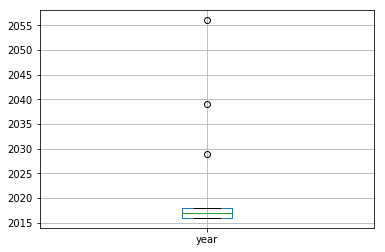

In [28]:
#lets now preceed to check for out liers and deal with them if any
df.boxplot(['year'])

In [0]:
#Year has too many outliers so we delete the column and according to our research question we may not need it.

In [0]:
df=df.drop('year', axis=1)

In [31]:
df.head(1)

,country,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


**Univariate** **Analysis**

In [0]:
#in this section we want to check for the distribution of the indiial variables across the data set

In [32]:
df['household_size'].describe()

count    23488.000000
mean         3.682434
std          2.279789
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

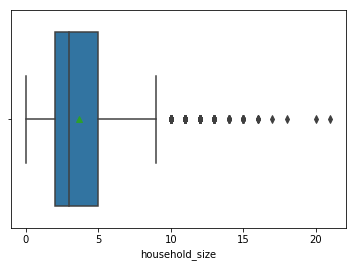

In [33]:
sns.boxplot(df['household_size'],showmeans=True)

In [34]:
#we check for distinct values in the column
df['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

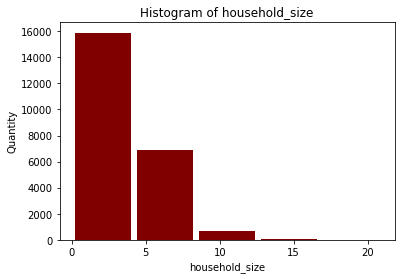

In [35]:

household_size = df['household_size']

plt.hist(household_size, bins=5, histtype='bar', rwidth=0.9, color='maroon')
plt.xlabel('household_size')
plt.ylabel('Quantity')
plt.title('Histogram of household_size')
plt.show()

In [36]:
df['age_of_respondent'].describe()

count    23488.000000
mean        38.798365
std         16.517111
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

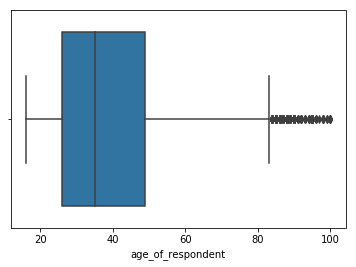

In [37]:
sns.boxplot(df['age_of_respondent'])

In [38]:
df['age_of_respondent'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

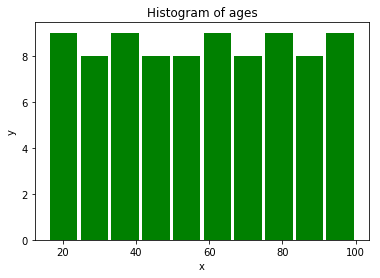

In [39]:
ages=[ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.]
bins=[0,10,20,30,40,50,60,70,80,90,100]
plt.hist(ages, bins=10, histtype='bar', rwidth=0.9,color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of ages') 
plt.show()

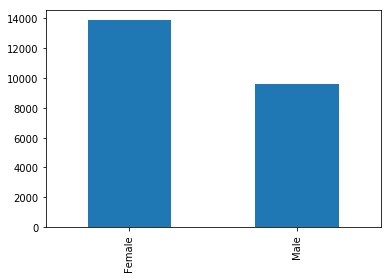

In [40]:
df['gender_of_respondent'].value_counts().head(10).plot.bar()

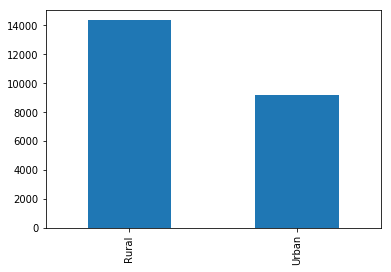

In [41]:
df['location_type'].value_counts().plot.bar()

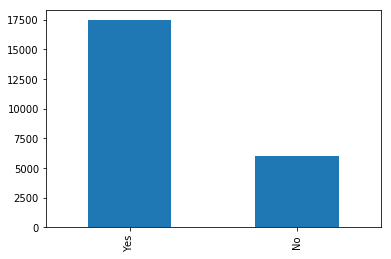

In [42]:
df['cellphone_access'].value_counts().plot.bar()

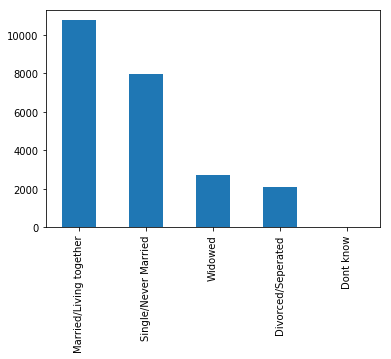

In [43]:
df['marital_status'].value_counts().head(10).plot.bar()

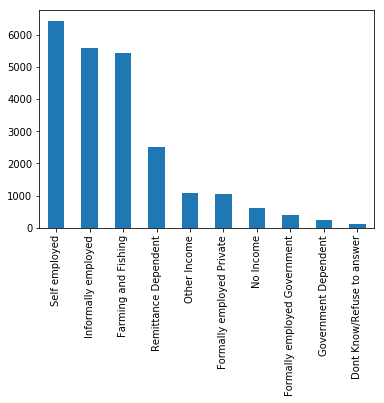

In [44]:
df['job_type'].value_counts().head(10).plot.bar()

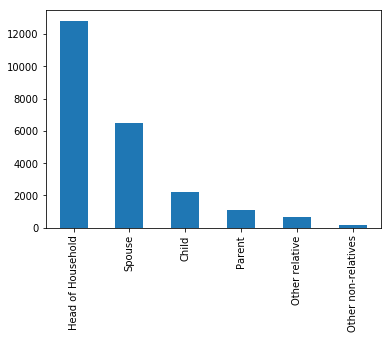

In [45]:
df['relationship_with_head'].value_counts().head(10).plot.bar()

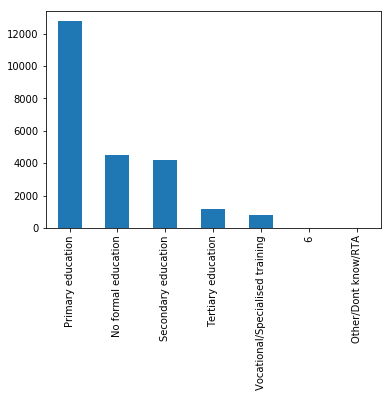

In [46]:
df['education_level'].value_counts().head(10).plot.bar()

In [47]:
df["age_of_respondent"].skew()

0.8432367721717701

In [48]:
df["household_size"].skew()

0.9779643076109984

BIVARIATE ANALYSIS

In [0]:
#we want to check for the distribution od variables and how they relate to one another . we shall also be establishing
#the strength of relationship if there exists

<Figure size 576x432 with 0 Axes>

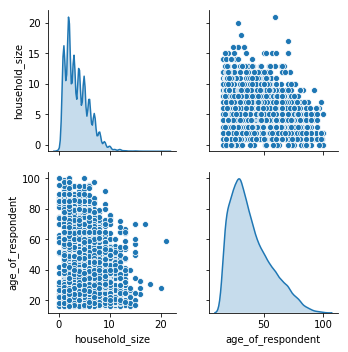

In [49]:

plt.figure(figsize=(8, 6))

sns.pairplot(df, diag_kind='kde')

In [0]:
#in the above plots we see no relationship between the two variables

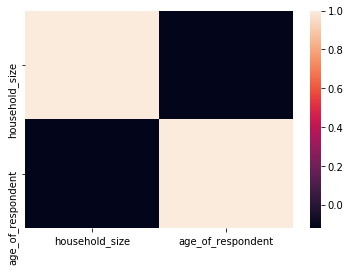

In [51]:
sns.heatmap(df.corr())
#the black shades confirm that there is completely no relationship between the two variables

Distributions of observations within categories

Text(0.5, 1.0, 'education level vs age of respondent')

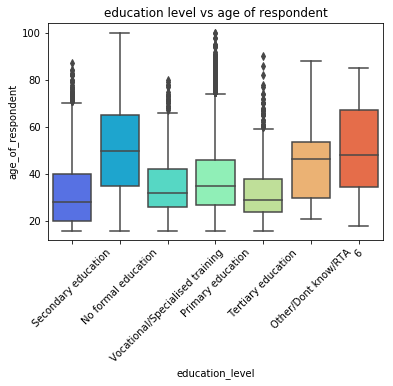

In [52]:
#we can use this to visualize how our observations are distributed within the various categories.
#we can say that the ages of the respondents in the category of educ level those with no formal education were more and older compared to the rest

sns.boxplot(x='education_level',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('education level vs age of respondent')


Text(0.5, 1.0, 'job_type vs age of respondent')

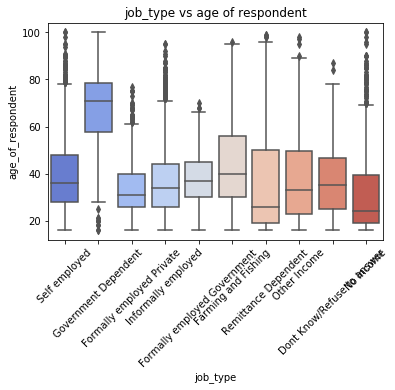

In [53]:
sns.boxplot(x='job_type',y='age_of_respondent',data=df,palette='coolwarm')
plt.xticks(rotation = 45)
plt.title('job_type vs age of respondent')

Text(0.5, 1.0, 'gender_of_respondent vs age of respondent')

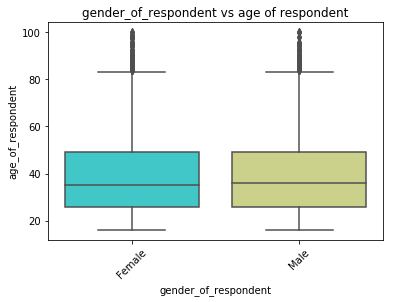

In [54]:
sns.boxplot(x='gender_of_respondent',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('gender_of_respondent vs age of respondent')


Text(0.5, 1.0, 'gender_of_respondent vs household_size')

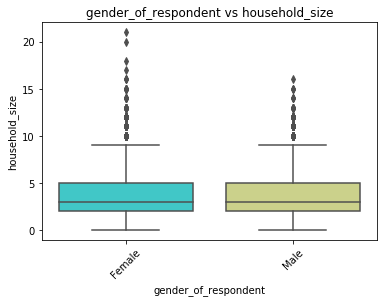

In [55]:
sns.boxplot(x='gender_of_respondent',y='household_size',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('gender_of_respondent vs household_size')


Text(0.5, 1.0, 'marital_status vs age of respondent')

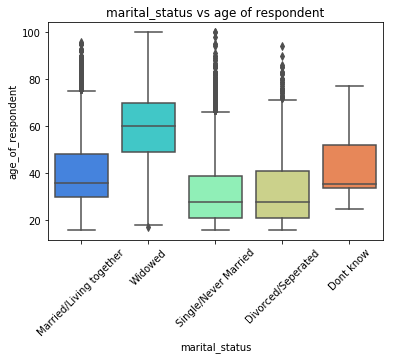

In [56]:
sns.boxplot(x='marital_status',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('marital_status vs age of respondent')


MULTIVARIATE ANALYSIS

In [0]:
#multiple regression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [0]:
#From our dataset we to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets.
X = df.iloc[:, 2:11]
y = df.iloc[:, 1]

In [0]:
#because the data is categorical we have to make them in aa form that we can run a regression model on it
X=pd.get_dummies(X)

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [61]:
X.head()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,24.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
X.shape

(23488, 36)

In [0]:
#the following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
X.corr()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
household_size,1.000000,-0.119547,0.274296,-0.274296,-0.098881,0.098881,-0.011383,0.011383,0.204176,-0.243987,0.020907,0.014008,0.042549,0.108472,-0.129591,-0.008562,0.345318,-0.182147,-0.153653,0.001970,-0.007242,0.004595,-0.024481,0.103938,-0.095953,-0.023432,0.024036,0.187667,0.002626,-0.071350,-0.046056,0.013797,-0.065247,0.062502,0.008741,-0.163493
age_of_respondent,-0.119547,1.000000,0.047655,-0.047655,0.104113,-0.104113,-0.013100,0.013100,-0.302325,0.419336,-0.078561,-0.134793,-0.195991,-0.111117,-0.119387,0.005254,0.053952,-0.296677,0.461621,0.023996,0.360183,0.009445,-0.071826,-0.210080,-0.090580,-0.037097,-0.002809,0.153257,-0.005689,-0.061668,0.171601,-0.089167,-0.060368,-0.014707,-0.057696,0.000349
location_type_Rural,0.274296,0.047655,1.000000,-1.000000,-0.084423,0.084423,0.012489,-0.012489,0.068322,-0.017219,-0.032579,-0.029158,-0.074674,0.026720,-0.023734,-0.008905,0.234817,-0.268135,0.052526,-0.001230,0.090966,-0.008905,0.017799,-0.043652,-0.085323,-0.050948,0.022834,0.346450,-0.047438,-0.068602,0.001937,0.070555,-0.044953,-0.011042,-0.053887,-0.294831
location_type_Urban,-0.274296,-0.047655,-1.000000,1.000000,0.084423,-0.084423,-0.012489,0.012489,-0.068322,0.017219,0.032579,0.029158,0.074674,-0.026720,0.023734,0.008905,-0.234817,0.268135,-0.052526,0.001230,-0.090966,0.008905,-0.017799,0.043652,0.085323,0.050948,-0.022834,-0.346450,0.047438,0.068602,-0.001937,-0.070555,0.044953,0.011042,0.053887,0.294831
cellphone_access_No,-0.098881,0.104113,-0.084423,0.084423,1.000000,-1.000000,0.102169,-0.102169,0.003930,-0.055867,-0.024740,0.030711,0.049297,0.030039,0.028535,-0.005601,-0.157799,0.065687,0.124062,0.011611,0.204055,-0.005601,0.009968,-0.119593,-0.100158,-0.099071,-0.001960,-0.111528,-0.071675,-0.105542,0.058542,0.008582,0.103625,0.006944,0.083344,0.055129
cellphone_access_Yes,0.098881,-0.104113,0.084423,-0.084423,-1.000000,1.000000,-0.102169,0.102169,-0.003930,0.055867,0.024740,-0.030711,-0.049297,-0.030039,-0.028535,0.005601,0.157799,-0.065687,-0.124062,-0.011611,-0.204055,0.005601,-0.009968,0.119593,0.100158,0.099071,0.001960,0.111528,0.071675,0.105542,-0.058542,-0.008582,-0.103625,-0.006944,-0.083344,-0.055129
gender_of_respondent_Female,-0.011383,-0.013100,0.012489,-0.012489,0.102169,-0.102169,1.000000,-1.000000,-0.042803,-0.413189,-0.000604,-0.011653,-0.011577,0.497592,-0.004082,-0.017478,-0.056472,-0.085626,0.219903,0.005248,0.114309,-0.003401,-0.018783,-0.058427,-0.041081,-0.024421,0.006619,0.001083,-0.028949,-0.061883,0.023870,-0.052365,0.072936,0.011060,0.120121,-0.035495
gender_of_respondent_Male,0.011383,0.013100,-0.012489,0.012489,-0.102169,0.102169,-1.000000,1.000000,0.042803,0.413189,0.000604,0.011653,0.011577,-0.497592,0.004082,0.017478,0.056472,0.085626,-0.219903,-0.005248,-0.114309,0.003401,0.018783,0.058427,0.041081,0.024421,-0.006619,-0.001083,0.028949,0.061883,-0.023870,0.052365,-0.072936,-0.011060,-0.120121,0.035495
relationship_with_head

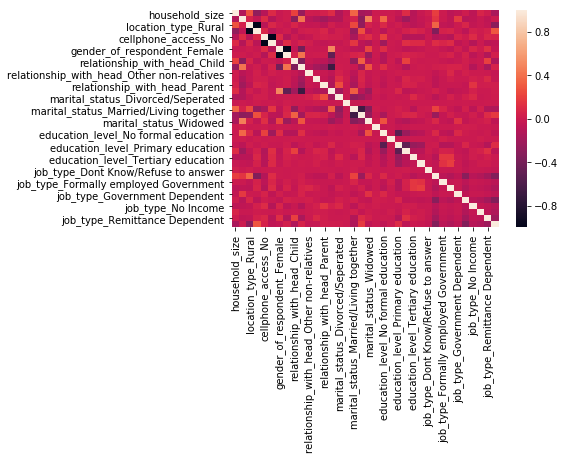

In [67]:
sns.heatmap(X.corr())

In [0]:
#We then create and train the model by fitting the linear regression model on the training data.
lm = LinearRegression()
results = lm.fit(X_train,y_train)

In [0]:
#Grabbing predictions off the test set and see how well it did
predictions = lm.predict(X_test)

In [70]:

X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     268.3
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:58:52   Log-Likelihood:                -5164.5
No. Observations:               23488   AIC:                         1.039e+04
Df Residuals:                   23458   BIC:                         1.063e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0831      0.009      8.855      0.0

In [0]:
#this model is not appropriate for modelling this kind of data. having assumed that there exists a linear relationship the relationship is too weak and absent in most variables 
#therefore yields a very poor model looking at the rsquared and adjusted -squared 

**Linear** **Discriminant** **Analysis**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [71]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [72]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4026    2]
 [ 662    8]]
Accuracy0.8586632609621115


In [0]:
#we can also try pca
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=23)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [76]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[4012   16]
 [ 567  103]]
0.8759046402724564


In [0]:
#from the above methods we attained an accuracy of 88%
#our data was sufficient.
#the data was relevant for our prediction